Part 1

In [102]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [103]:

def pointDerivative(fun, value):
    h = 1.0e-10
    top = fun(value + h) - fun(value)
    result =  top / h

    return result

def intervalDerivative(fun, start, end, n=100000):
    deltaX = (end - start) / n
    x = np.arange(start,end,deltaX)
    values = np.array([pointDerivative(fun, xi) for xi in x])
    
    return x, values

def riemmanSum(fun, start, end):
    n = 100000
    deltaX = (end - start)/n
    x = np.arange(start, end, deltaX)
    values = np.array([fun(xi)*deltaX for xi in x])
        
    return np.sum(values)

In [104]:

def f(x): 
    return np.sin(x)
def g(x):
    return x**2
def h(x):
    return np.exp(-3*x)

functions = { "sin(x)" : [f, "cos(x)", "-cos(x)"],
             "$x^2$" : [g, "2x", "$x^{3}/3$"],
             "$e^{-3x}$" : [h, "$-3e^{-3x}$", "$-e^{-3x}/3$"]
}

Derivative and Riemman sum estimator for sin(x), x^2 and exp(-3x)

In [105]:
def plot(original, newFun, x_axis, label_1, label_2):
    plt.figure(figsize=(14,8))

    plt.plot(x_axis, original, label = label_1)
    plt.plot(x_axis, newFun, label = "shoduld be: "+label_2)
    plt.legend()
    plt.show()
    

Testing numerical differentiator


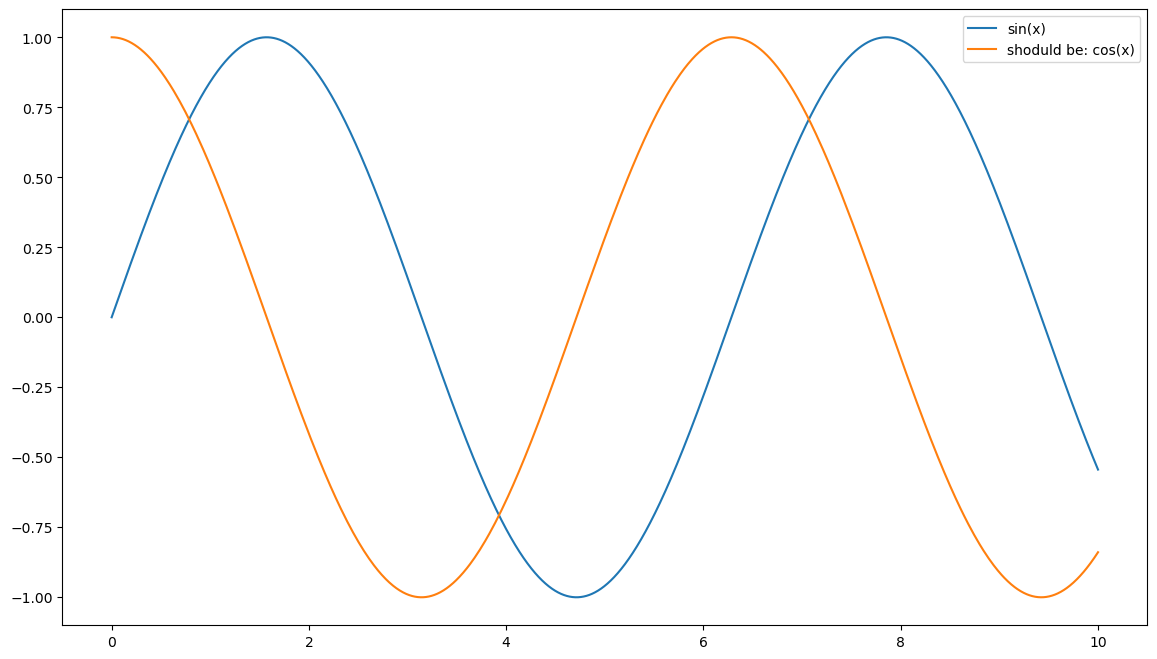

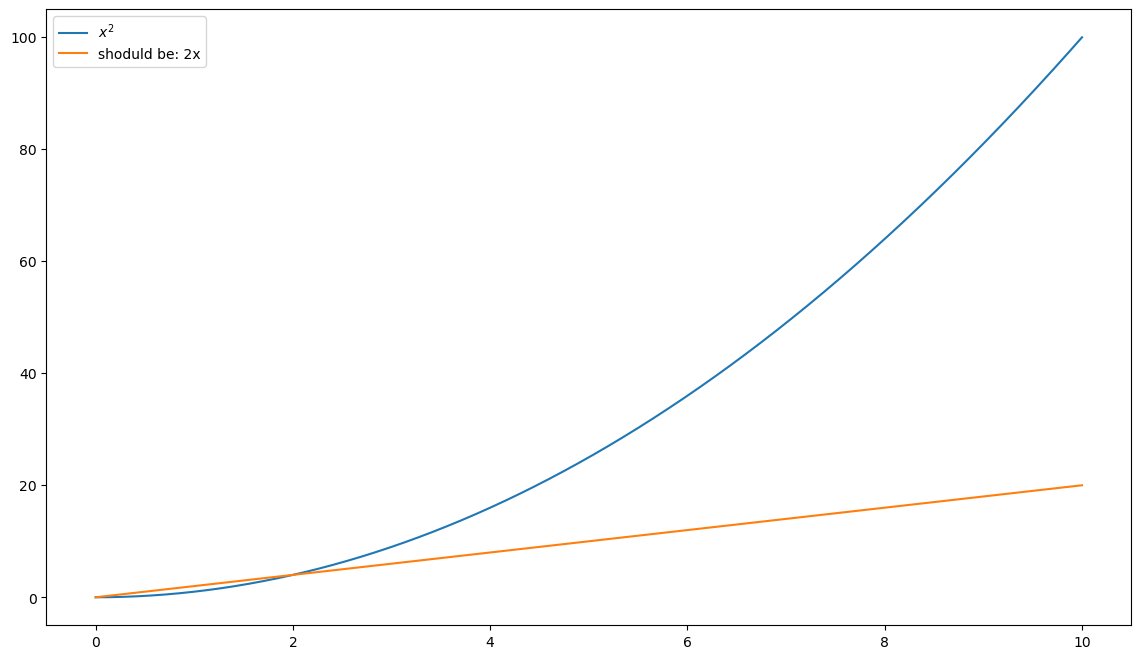

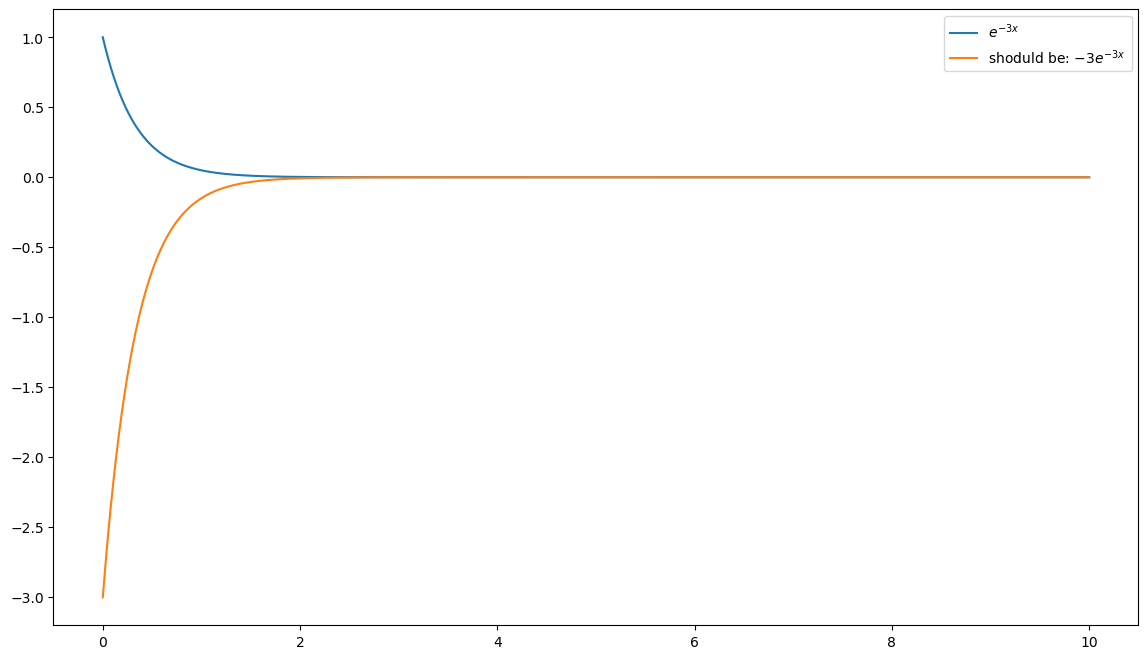

In [106]:
print("Testing numerical differentiator")
a = 0
b = 10

for key, info in functions.items():
    fun = info[0]
    der_label = info[1]
    intg_label = info[2]

    x_values, derivative = intervalDerivative(fun, a, b)
    plot(fun(x_values), derivative, x_values, key, der_label)



Part 2

In [319]:
def plot2(original, newFun, x_axis, label_1, label_2, i=0):
    if i == 0:
        plt.plot(x_axis, original, label = label_1)
    plt.plot(x_axis, newFun, label = label_2)
    plt.xlim(0,5)
    plt.ylim(-15,10)
    

In [320]:
def taylorSeries(fun, order, value, label_1):
    if order<=0:
        return
    
    x_values, der_values = intervalDerivative(fun, a, b)
    currDerivative = [lambda x, xv=x_values, dv=der_values: np.interp(x, xv, dv)]
    orderFun = [lambda x: x]
    taylorApprox = [lambda x, fval=fun(value), odf=orderFun[0], cdf=currDerivative[0]: fval + odf(x) * cdf(value)]
    default_x = np.linspace(a, b, len(x_values))
    approx_values = [taylorApprox[0](x) for x in default_x]
    plot2(fun(default_x), approx_values, default_x, label_1, f"Taylor Series order 1")

    for n in range(1, order):
        x_values, der_values = intervalDerivative(currDerivative[-1], a, b)
        currDerivative.append(lambda x, xv=x_values, dv=der_values: np.interp(x, xv, dv))
        orderFun.append(lambda x, n=n: x**(n+1) / np.math.factorial(n+1))

        preApp = taylorApprox[-1]
        currDer = currDerivative[-1] 
        ordFun = orderFun[-1]

        if abs(currDer(value)) < 1.0e-5:
            taylorApprox.append(lambda x, pA=preApp: pA(x))
        else:
            taylorApprox.append(lambda x, pA=preApp, cD=currDer, oF=ordFun, val=value: pA(x) + cD(val) * oF(x))

        approx_values = [taylorApprox[-1](x) for x in default_x]
        plot2(fun(default_x), approx_values, default_x, label_1, f"Taylor Series order {n+1}", 1)
    plt.legend()
    plt.show()
    

C:\Users\Javier\AppData\Local\Temp\ipykernel_1776\3247767196.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  orderFun.append(lambda x, n=n: x**(n+1) / np.math.factorial(n+1))


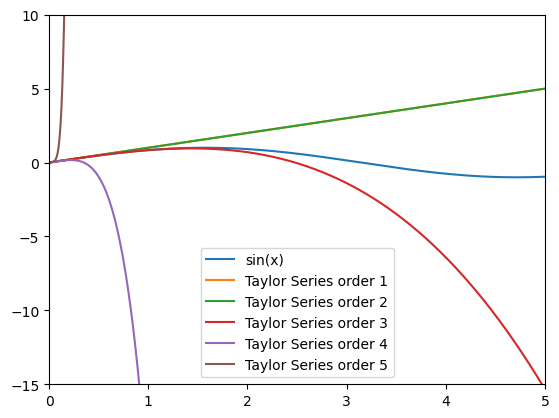

In [321]:
newApprox = taylorSeries(f,5,0,"sin(x)")
    

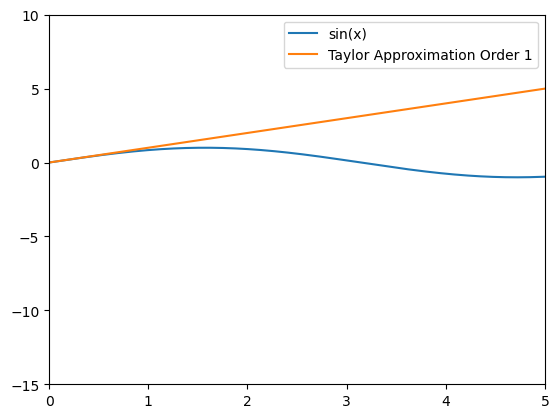

In [322]:
# Function to compute the first-order Taylor series approximation
def taylor_series_first_order(fun, fun_prime, x0, x):
    return fun(x0) + fun_prime(x0) * (x - x0)

# Sine function and its derivative (cosine function)
f = np.sin
f_prime = np.cos

# Points to plot
x_test = np.linspace(0, 5, 400)

# First-order Taylor series approximation around x0 = 0
x0 = 0
y_test = taylor_series_first_order(f, f_prime, x0, x_test)

# Plot the original function and the Taylor series approximation
plt.plot(x_test, f(x_test), label="sin(x)")
plt.plot(x_test, y_test, label="Taylor Approximation Order 1")
plt.xlim(0, 5)
plt.ylim(-15, 10)
plt.legend()
plt.show()